In [52]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
import pandas as pd
import pickle
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [53]:
Dados = pd.read_csv(r'C:\Users\Mateus\Meu Drive\Compartilhado\eng\9_periodo\Controle inteligente\Trab_02\Coleta_csv\teste3.csv', on_bad_lines='skip', header=None)
# Dados.values
# Dados.head(5)
# print(Dados)

Entradas = Dados.iloc[:,:-1]
Entradas.shape
Saidas = Dados.iloc[:,4]

In [54]:
Entradas

,0,1,2,3
0,-723.923833,-18910.418713,155.523129,20608.846771
1,-837.407040,5283.504181,1378.153157,-5890.874351
2,-800.373583,3865.077727,897.798890,-4328.296385
3,-780.124813,-3957.823702,721.207956,4230.013959
4,-808.241109,563.653724,710.311049,-720.552470
...,...,...,...,...
28070,-1.537227,1.538105,0.356183,-0.357007
28071,-1.526634,1.538623,0.336247,-0.348198
28072,-1.516038,1.538824,0.316802,-0.339567
28073,-1.505440,1.538718,0.297839,-0.331111


In [55]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(Entradas,Saidas,test_size=0.2)

In [56]:
Rede=MLPRegressor(hidden_layer_sizes=[4,4,2,1],
                  activation='relu',
                  verbose=True,
                  max_iter=10000,
                  solver="adam")
Rede.fit(Entradas,Saidas)

Iteration 1, loss = 12244.82163499
Iteration 2, loss = 12241.52629657
Iteration 3, loss = 12241.32762683
Iteration 4, loss = 12241.32427313
Iteration 5, loss = 12241.32276198
Iteration 6, loss = 12241.32051199
Iteration 7, loss = 12241.31504937
Iteration 8, loss = 12241.31174892
Iteration 9, loss = 12241.30927649
Iteration 10, loss = 12241.30308537
Iteration 11, loss = 12241.30364043
Iteration 12, loss = 12241.30457898
Iteration 13, loss = 12241.29599073
Iteration 14, loss = 12241.29445877
Iteration 15, loss = 12241.29139494
Iteration 16, loss = 12241.28709412
Iteration 17, loss = 12241.28533646
Iteration 18, loss = 12241.28215108
Iteration 19, loss = 12241.28115428
Iteration 20, loss = 12241.27641638
Iteration 21, loss = 12241.27601191
Iteration 22, loss = 12241.27077231
Iteration 23, loss = 12241.26886521
Iteration 24, loss = 12241.26680140
Iteration 25, loss = 12241.26381434
Iteration 26, loss = 12241.26210417
Iteration 27, loss = 12241.26476937
Iteration 28, loss = 12241.25769894
I

MLPRegressor(hidden_layer_sizes=[4, 4, 2, 1], max_iter=10000, verbose=True)

In [5]:
rede=MLPRegressor(hidden_layer_sizes=[4,4,2,1],
                  activation='relu',
                  verbose=True,
                  tol=0.0001,
                  n_iter_no_change=20,
                  max_iter=100000)
rede.fit(Xtrain,Ytrain)

Iteration 1, loss = 12430.05969576
Iteration 2, loss = 12430.05464689
Iteration 3, loss = 12430.05090712
Iteration 4, loss = 12430.04982589
Iteration 5, loss = 12430.04395431
Iteration 6, loss = 12430.04572666
Iteration 7, loss = 12430.04406914
Iteration 8, loss = 12430.04701996
Iteration 9, loss = 12430.04024021
Iteration 10, loss = 12430.03589170
Iteration 11, loss = 12430.03532271
Iteration 12, loss = 12430.03276887
Iteration 13, loss = 12430.03083187
Iteration 14, loss = 12430.02908809
Iteration 15, loss = 12430.02911995
Iteration 16, loss = 12430.02490999
Iteration 17, loss = 12430.02312142
Iteration 18, loss = 12430.02195567
Iteration 19, loss = 12430.01969006
Iteration 20, loss = 12430.01424018
Iteration 21, loss = 12430.00626155
Iteration 22, loss = 12429.75204863
Iteration 23, loss = 12429.56816324
Iteration 24, loss = 12429.40316276
Iteration 25, loss = 12429.34785829
Iteration 26, loss = 12429.48936377
Iteration 27, loss = 12429.44185946
Iteration 28, loss = 12429.46553582
I

MLPRegressor(hidden_layer_sizes=[4, 4, 2, 1], max_iter=100000,
             n_iter_no_change=20, verbose=True)

In [8]:
r2train=rede.score(Xtrain, Ytrain)
print("R2 Score do treinamento: ", r2train)
r2test=rede.score(Xtest, Ytest)
print("R2 Score do teste: ", r2test)

R2 Score do treinamento:  0.669470407125214
R2 Score do teste:  0.6721085072260617


In [68]:
Xtest.shape

(6211, 4)

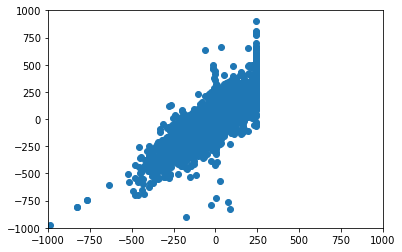

In [10]:
Ypred=rede.predict(Xtest)
plt.scatter(Ypred,Ytest)
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
#plt.scatter(Xtest,Ypred)
plt.show()

In [21]:
filename = 'finalized_model4421.sav'
pickle.dump(rede, open(filename, 'wb'))
 
# some time later...
 


In [50]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, Ytest)
print(result)

0.6465708993511641


In [37]:
#Ypredi=np.round(Ypredi)
Ypredi
Ypredi.reshape(-1,1)

array([[-0.20280299],
       [-0.27898413],
       [-0.25430423],
       ...,
       [ 4.841336  ],
       [ 4.860082  ],
       [ 4.7861333 ]], dtype=float32)